In [24]:
import pandas as pd
import requests

import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

In [25]:
key = "5450686d766e6f6b3937656b725948"
d_type = 'xml'
start_page = '1'
end_page = '1000'

url = 'http://openapi.seoul.go.kr:8088/'+ key +'/'+ d_type +'/LOCALDATA_072404/'+ start_page +'/'+ end_page + '/'

In [26]:
df = pd.read_xml(url)

### 종합

In [27]:
x = 1001


for i in range(2000, 500000, 1000):
    try:
        url = 'http://openapi.seoul.go.kr:8088/'+ key +'/'+ d_type +'/LOCALDATA_072404/'+ str(x) +'/'+ str(i) + '/'
        
        x = x + 1000
        
        df2 = pd.read_xml(url)
        
        df = pd.concat([df, df2])
        
        
    except: 
        pass

In [28]:
df

,list_total_count,CODE,MESSAGE,OPNSFTEAMCODE,MGTNO,APVPERMYMD,APVCANCELYMD,TRDSTATEGBN,TRDSTATENM,DTLSTATEGBN,...,FCTYSILJOBEPCNT,FCTYPDTJOBEPCNT,BDNGOWNSENM,ISREAM,MONAM,MULTUSNUPSOYN,FACILTOTSCP,JTUPSOASGNNO,JTUPSOMAINEDF,HOMEPAGE
0,477511.0,None,None,NaN,None,NaN,NaN,NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN
1,NaN,INFO-000,정상 처리되었습니다,NaN,None,NaN,NaN,NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN
2,NaN,None,None,3000000.0,3000000-101-1995-05829,19951111.0,NaN,1.0,영업/정상,1.0,...,NaN,NaN,NaN,NaN,NaN,N,725.98,NaN,NaN,NaN
3,NaN,None,None,3000000.0,3000000-101-2002-11872,20020206.0,NaN,1.0,영업/정상,1.0,...,NaN,NaN,NaN,NaN,NaN,N,286.07,NaN,NaN,NaN
4,NaN,None,None,3000000.0,3000000-101-1990-03102,19900531.0,NaN,1.0,영업/정상,1.0,...,NaN,NaN,NaN,NaN,NaN,N,23.12,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,NaN,None,None,3220000.0,3220000-101-1994-14896,19940917.0,NaN,1.0,영업/정상,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
509,NaN,None,None,3020000.0,3020000-101-1988-00925,19880704.0,NaN,1.0,영업/정상,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
510,NaN,None,None,3140000.0,3140000-101-1983-00740,19830309.0,NaN,3.0,폐업,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
511,NaN,None,None,3120000.0,3120000-101-2001-05311,20010915.0,NaN,3.0,폐업,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 필요한 칼럼만 추출

In [29]:
df.drop([0, 1], axis=0, inplace=True)

In [44]:
data = df[['BPLCNM','TRDSTATENM', 'SITEPOSTNO', 'SITEWHLADDR', 'RDNWHLADDR', 'X', 'Y']]

data.reset_index(inplace=True, drop=True)

### 폐업 데이터 삭제

In [45]:
data['TRDSTATENM'].unique()

array(['영업/정상', '폐업'], dtype=object)

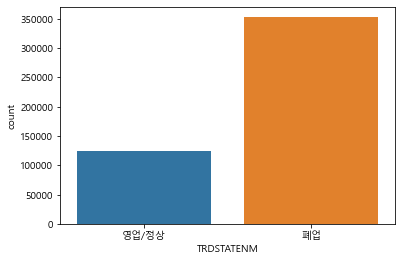

In [46]:
fig = plt.figure()

sns.countplot(data= data, x='TRDSTATENM')

plt.show()

In [47]:
close_idx = data[data['TRDSTATENM'].str.contains("폐업")].index

data.drop(close_idx, inplace=True)

C:\Users\wogml\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [49]:
data.reset_index(inplace=True, drop=True)
data

,BPLCNM,TRDSTATENM,SITEPOSTNO,SITEWHLADDR,RDNWHLADDR,X,Y
0,북악파크부페,영업/정상,110846.0,서울특별시 종로구 평창동 110-1번지,서울특별시 종로구 평창길 352 (평창동),197993.205677,456584.627065
1,시민식당 2호점,영업/정상,110290.0,서울특별시 종로구 인사동 98번지,"서울특별시 종로구 종로11길 10, 1,2층 (인사동)",198681.571899,452050.274345
2,일번우동,영업/정상,110126.0,서울특별시 종로구 종로6가 129-1번지,서울특별시 종로구 종로41길 10 (종로6가),200533.453584,452156.900283
3,서촌소국밥,영업/정상,110043.0,서울특별시 종로구 통인동 27-2,서울특별시 종로구 필운대로6길 17-1 (통인동),197250.385438,453135.451266
4,빽다방 동대문역점,영업/정상,110843.0,서울특별시 종로구 창신동 696-1,서울특별시 종로구 종로 289 (창신동),200811.925354,452162.569488
...,...,...,...,...,...,...,...
124905,20bucks,영업/정상,130831.0,서울특별시 동대문구 이문동 316-2 지하1층,"서울특별시 동대문구 휘경로2길 19, 지하1층 (이문동)",205294.170617,454765.261112
124906,DNJ,영업/정상,139230.0,서울특별시 노원구 하계동 256-11 보스턴 산부인과,"서울특별시 노원구 노원로 244, 보스턴 산부인과 1층 (하계동)",206490.594308,459688.060943
124907,희래등반점,영업/정상,110811.0,서울특별시 종로구 명륜3가 1-14,서울특별시 종로구 명륜길 31 (명륜3가),199506.183606,454029.397330
124908,별달맛집,영업/정상,135894.0,서울특별시 강남구 신사동 609-1 지하1층,"서울특별시 강남구 압구정로30길 23 (신사동,지하1층)",202534.550000,447079.205000


### 저장

In [50]:
data.to_csv('C:/worksplaces/workspace_project/project_visual/restaurant_data/data/restaurant.csv', encoding='utf-8', index=True)